In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,log_loss, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report

In [2]:
# 데이터 경로 설정
base_path = 'resized_skintype'

# 얼굴 부위 및 피부 상태 설정
skin_states = ['dry', 'oily']

# 데이터 불러오기
data = []
labels = []

for state in skin_states:
    for data_type in ['resized_train', 'resized_test']:
        folder_path = os.path.join(base_path, data_type, state)

        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)

            if os.path.isfile(img_path):
                img = cv2.imread(img_path)

                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (128, 128))

                    data.append(img)
                    labels.append(f'{state}') 
                else:
                    print(f"Warning: Unable to read the image at {img_path}")

# 데이터와 레이블을 numpy 배열로 변환
data = np.array(data)
labels = np.array(labels)

# 레이블 인코딩
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

if data.shape[0] > 0 and encoded_labels.size > 0:
    # 레이블 인코딩
    encoded_labels = to_categorical(encoded_labels)

    # 데이터 분할 (8:2 비율)
    X_train, X_test, y_train, y_test = train_test_split(data, encoded_labels, test_size=0.2, random_state=42)
else:
    print("Error: No data or labels to split.")


In [13]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128,128, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
23/23 [==============================] - 76s 3s/step - loss: 0.7144 - accuracy: 0.6264 - val_loss: 0.9760 - val_accuracy: 0.6111
Epoch 2/200
23/23 [==============================] - 68s 3s/step - loss: 0.2903 - accuracy: 0.8833 - val_loss: 1.0995 - val_accuracy: 0.5944
Epoch 3/200
23/23 [==============================] - 72s 3s/step - loss: 0.1347 - accuracy: 0.9597 - val_loss: 1.0239 - val_accuracy: 0.6500
Epoch 4/200
23/23 [==============================] - 71s 3s/step - loss: 0.0937 - accuracy: 0.9681 - val_loss: 1.5260 - val_accuracy: 0.6444
Epoch 5/200
23/23 [==============================] - 68s 3s/step - loss: 0.0842 - accuracy: 0.9681 - val_loss: 2.9861 - val_accuracy: 0.5889
Epoch 6/200
23/23 [==============================] - 84s 4s/step - loss: 0.1246 - accuracy: 0.9597 - val_loss: 1.3434 - val_accuracy: 0.6889
Epoch 7/200
23/23 [==============================] - 83s 4s/step - loss: 0.1947 - accuracy: 0.9333 - val_loss: 1.9082 - val_accuracy: 0.6500
Epoch 8/200
2

Epoch 59/200
23/23 [==============================] - 70s 3s/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 2.0703 - val_accuracy: 0.7111
Epoch 60/200
23/23 [==============================] - 71s 3s/step - loss: 0.0364 - accuracy: 0.9931 - val_loss: 2.6044 - val_accuracy: 0.6500
Epoch 61/200
23/23 [==============================] - 82s 3s/step - loss: 0.0318 - accuracy: 0.9875 - val_loss: 1.7635 - val_accuracy: 0.6667
Epoch 62/200
23/23 [==============================] - 99s 4s/step - loss: 0.0200 - accuracy: 0.9903 - val_loss: 1.5791 - val_accuracy: 0.6889
Epoch 63/200
23/23 [==============================] - 75s 3s/step - loss: 0.0206 - accuracy: 0.9958 - val_loss: 1.6234 - val_accuracy: 0.7056
Epoch 64/200
23/23 [==============================] - 82s 4s/step - loss: 0.0357 - accuracy: 0.9903 - val_loss: 2.0029 - val_accuracy: 0.6944
Epoch 65/200
23/23 [==============================] - 60s 3s/step - loss: 0.0324 - accuracy: 0.9819 - val_loss: 2.4286 - val_accuracy: 0.7222
Epoch 

23/23 [==============================] - 84s 4s/step - loss: 0.0060 - accuracy: 0.9958 - val_loss: 1.8456 - val_accuracy: 0.7389
Epoch 117/200
23/23 [==============================] - 82s 4s/step - loss: 0.0025 - accuracy: 0.9986 - val_loss: 1.7604 - val_accuracy: 0.7611
Epoch 118/200
23/23 [==============================] - 61s 3s/step - loss: 0.0027 - accuracy: 0.9986 - val_loss: 1.8109 - val_accuracy: 0.7556
Epoch 119/200
23/23 [==============================] - 60s 3s/step - loss: 0.0020 - accuracy: 0.9986 - val_loss: 1.8480 - val_accuracy: 0.7556
Epoch 120/200
23/23 [==============================] - 63s 3s/step - loss: 0.0099 - accuracy: 0.9944 - val_loss: 1.8038 - val_accuracy: 0.7222
Epoch 121/200
23/23 [==============================] - 69s 3s/step - loss: 0.0628 - accuracy: 0.9833 - val_loss: 2.0506 - val_accuracy: 0.6944
Epoch 122/200
23/23 [==============================] - 66s 3s/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 1.8087 - val_accuracy: 0.6944
Epoch 123/200

23/23 [==============================] - 83s 4s/step - loss: 0.0046 - accuracy: 0.9972 - val_loss: 2.6886 - val_accuracy: 0.7111
Epoch 174/200
23/23 [==============================] - 88s 4s/step - loss: 0.0106 - accuracy: 0.9958 - val_loss: 2.6042 - val_accuracy: 0.7111
Epoch 175/200
23/23 [==============================] - 84s 4s/step - loss: 0.0171 - accuracy: 0.9931 - val_loss: 2.4261 - val_accuracy: 0.7222
Epoch 176/200
23/23 [==============================] - 85s 4s/step - loss: 0.0120 - accuracy: 0.9958 - val_loss: 2.2142 - val_accuracy: 0.7167
Epoch 177/200
23/23 [==============================] - 21199s 963s/step - loss: 0.0130 - accuracy: 0.9931 - val_loss: 1.9689 - val_accuracy: 0.6944
Epoch 178/200
23/23 [==============================] - 67s 3s/step - loss: 0.0070 - accuracy: 0.9972 - val_loss: 2.0544 - val_accuracy: 0.7167
Epoch 179/200
23/23 [==============================] - 83s 4s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.1200 - val_accuracy: 0.7389
Epoch 18

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 4, 4, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 4,706,469
Trainable params: 4,664,446
Non-trainable params: 42,023
_________________________________________________________________


In [5]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 출력
for i in range(5):  # 예측 결과 중에서 처음 5개만 출력
    predicted_class = label_encoder.classes_[np.argmax(y_pred[i])]
    actual_class = label_encoder.classes_[np.argmax(y_test[i])]
    print(f'Actual: {actual_class}, Predicted: {predicted_class}')

6/6 [==============================] - 3s 534ms/step - loss: 2.7290 - accuracy: 0.6889
Test Loss: 2.728950023651123, Test Accuracy: 0.6888889074325562
Actual: dry, Predicted: dry
Actual: oily, Predicted: oily
Actual: dry, Predicted: oily
Actual: oily, Predicted: oily
Actual: dry, Predicted: oily


In [6]:
# One-hot 인코딩된 레이블을 다시 범주형 레이블로 변환
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Precision(정밀도) 계산
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
print(f'Precision: {precision}')

# Recall(재현율) 계산
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
print(f'Recall: {recall}')

# F1 score 계산
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
print(f'F1 Score: {f1}')

y_pred_proba = model.predict_proba(X_test)  # 양성 클래스의 확률 추정치

# Log Loss 계산
logloss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {logloss}')

# 레이블 인코딩을 다시 이진 분류에 맞게 변경
binary_y_test = (y_test[:, label_encoder.classes_ == 'oily']).flatten()
binary_predictions = y_pred[:, label_encoder.classes_ == 'oily'].flatten()

# ROC 곡선 및 AUC 계산
fpr, tpr, thresholds = roc_curve(binary_y_test, binary_predictions)

# AUC-ROC 출력
roc_auc = auc(fpr, tpr)
print(f'AUC-ROC: {roc_auc}')

Precision: 0.6916158117543569
Recall: 0.6888888888888888
F1 Score: 0.6888888888888888


C:\Users\qsf98\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Log Loss: 2.7289499796014747
AUC-ROC: 0.7564943097476498


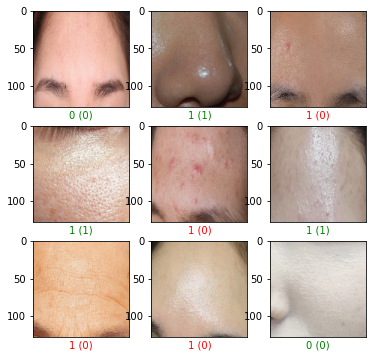

In [7]:
# 예측 결과 시각화
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks()
    predicted_label = np.argmax(y_pred[i])
    true_label = np.argmax(y_test[i])
    if np.array_equal(predicted_label, true_label):
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
plt.show()

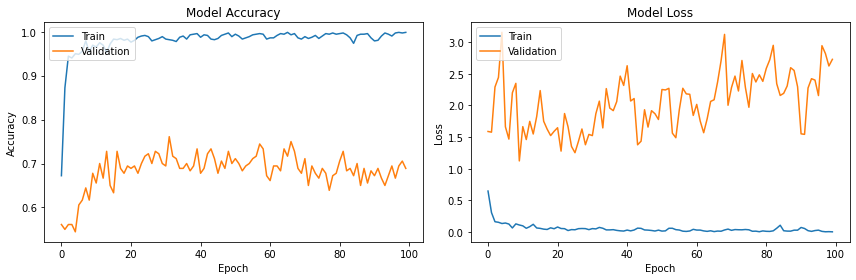

In [8]:
# 손실 및 정확도 그래프 생성
def plot_training_history(history):
    # 전체 창의 크기 설정
    plt.figure(figsize=(12, 4))

    # 훈련 및 검증 정확도 값 플롯
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])  # 훈련 정확도
    plt.plot(history.history['val_accuracy'])  # 검증 정확도
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # 훈련 및 검증 손실 값 플롯
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])  # 훈련 손실
    plt.plot(history.history['val_loss'])  # 검증 손실
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # 그래프 간격 조절
    plt.tight_layout()
    
    # 그래프 출력
    plt.show()

# 학습 과정의 손실 및 정확도 그래프 플롯
plot_training_history(history)

In [9]:
# 예측 결과를 레이블로 변환
predictions = np.argmax(y_pred, axis=1)

# 혼동 행렬 생성
cm = confusion_matrix(np.argmax(y_test, axis=1), predictions)

# 분류 보고서 생성
report = classification_report(np.argmax(y_test, axis=1), predictions, target_names=label_encoder.classes_)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[62 32]
 [24 62]]

Classification Report:
              precision    recall  f1-score   support

         dry       0.72      0.66      0.69        94
        oily       0.66      0.72      0.69        86

    accuracy                           0.69       180
   macro avg       0.69      0.69      0.69       180
weighted avg       0.69      0.69      0.69       180



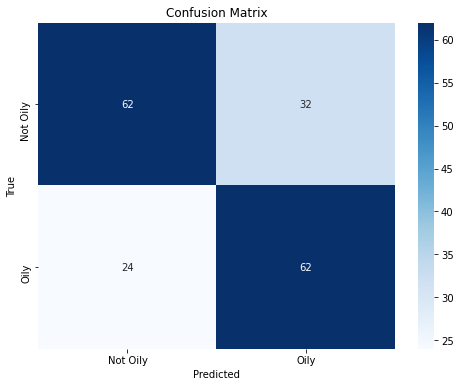

In [10]:
# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Oily', 'Oily'], yticklabels=['Not Oily', 'Oily'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

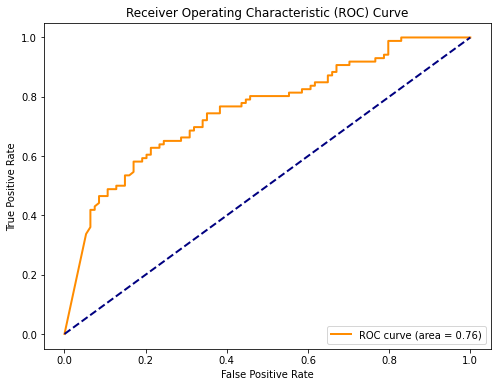

In [11]:
# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()